## Titanic Survival Perdiction 

##### First Kaggle Assignment ####

1) Introduction

Import Libraries
Load data
Run Statistical summaries
Figure out missing value columns

2) Visualizations

Correlation with target variable

3) Missing values imputation

train data Missing columns- Embarked,Age,Cabin
test data Missing columns- Age and Fare


4) Feature Engineering

Calculate total family size
Get title from name
Find out which deck passenger belonged to
Dealing with Categorical Variables
Label encoding
Feature Scaling


5) Prediction

Split into training & test sets
Build the model
Feature importance
Predictions
Ensemble : Majority voting
6) Submission

In [14]:

import numpy as np

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_cc2889efb40a4122af2dd557f0bb5425 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='NCd9Yeltx1H8c6ngKLx7UtuQxEjYISeWrnaZ7CytmikH',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_cc2889efb40a4122af2dd557f0bb5425.get_object(Bucket='titanic-donotdelete-pr-sd371zfeyqvse8',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:

body = client_cc2889efb40a4122af2dd557f0bb5425.get_object(Bucket='titanic-donotdelete-pr-sd371zfeyqvse8',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
print("Number of Rows % columns in  train dataset", train.shape)
print("Number of Rows % columns in  test dataset", test.shape)


Number of Rows % columns in  train dataset (891, 12)
Number of Rows % columns in  test dataset (418, 11)


In [28]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
### Describe command helps me to take the decision regarding the imputation.
# After looking into the above description these are the infrences which i can conclude in first go:

# a.Passenger id : number incremented by 1 can be removed
# b.Survived: Target variable with values between zero and one
# c.Pclass :Ordinal Variable values lies between 1 and 3 
# d.Age :Has missing values so imputation needed over there ,Secondly maximum age is 80 which is fine but the smallest age is 0.42 which needs to be be verified
# e.SibSp: This variables provides information about number of siblings/Spouse,Minimum value is 0 and max is 6
# f.Parch: This variables tells about the number of Parent/Children aboard Values lie between 0 and 6
# g.Fare: Min fare i can see is zero which is not possible needs to be verified .Max fare is 512


In [ ]:
# Describe doesn't provide information about categorical variable.Lets 

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
# Age and Cabin has null values .Furthermore Embarked has null value


In [71]:
# Show me seaborn skills :D

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)
sns.set_context("talk")

In [64]:
# Missing Values 
missing_values=train.isnull().sum()
missing_values=missing_values[missing_values>0]

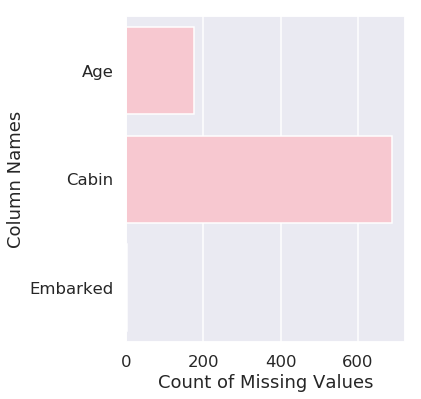

In [76]:
f, ax = plt.subplots(figsize=(5,6))
sns.axes_style("whitegrid")
ax.set_xlabel('Count of Missing Values')
ax.set_ylabel('Column Names')
sns.barplot(x=missing_values.values,y=missing_values.index,color='pink')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc829903710>,
      dtype=object)

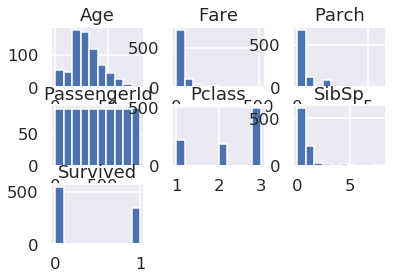

In [77]:
train.hist()